In [133]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter optimization
import optuna

# Surrogate model 
import xgboost as xgb

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [134]:
df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Typhoon Name             1776 non-null   object 
 1   Year                     1776 non-null   int64  
 2   Region                   1776 non-null   int64  
 3   Province                 1776 non-null   object 
 4   City/Municipality        1776 non-null   object 
 5   Families                 1776 non-null   int64  
 6   Person                   1776 non-null   int64  
 7   Brgy                     1776 non-null   int64  
 8   Dead                     1776 non-null   int64  
 9   Injured/Ill              1776 non-null   int64  
 10  Missing                  1776 non-null   int64  
 11  Totally                  1776 non-null   int64  
 12  Partially                1776 non-null   int64  
 13  Total                    1776 non-null   int64  
 14  Quantity                

In [136]:
df.isnull().sum()

Typhoon Name               0
Year                       0
Region                     0
Province                   0
City/Municipality          0
Families                   0
Person                     0
Brgy                       0
Dead                       0
Injured/Ill                0
Missing                    0
Totally                    0
Partially                  0
Total                      0
Quantity                   0
Cost                       0
Nearest_Station            0
Station_Province           0
Distance_km                0
PAR_START                  0
PAR_END                    0
Duration_in_PAR_Hours      0
Max_Sustained_Wind_kph     0
Typhoon_Type               0
Max_24hr_Rainfall_mm       0
Total_Storm_Rainfall_mm    0
Min_Pressure_hPa           0
Weather_Station_Mapped     0
Weather_Records_Found      0
Weather_Days_Covered       0
dtype: int64

In [137]:
df.columns

Index(['Typhoon Name', 'Year', 'Region', 'Province', 'City/Municipality',
       'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing',
       'Totally', 'Partially', 'Total', 'Quantity', 'Cost', 'Nearest_Station',
       'Station_Province', 'Distance_km', 'PAR_START', 'PAR_END',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Station_Mapped', 'Weather_Records_Found',
       'Weather_Days_Covered'],
      dtype='object')

In [138]:
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [139]:
df.drop(columns=['Quantity', 'PAR_START', 'PAR_END', 'Weather_Days_Covered', 'Total', 'Weather_Station_Mapped', 'Station_Province', 'Nearest_Station', 'Year', 'Typhoon Name', 'City/Municipality', 'Province', 'Distance_km'], inplace=True)
df.head()

,Region,Families,Person,Brgy,Dead,Injured/Ill,Missing,Totally,Partially,Cost,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Records_Found
0,2,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,STY,25.6,39.00,977.1,6
1,2,968,3028,5,0,0,0,0,0,494592.00,133.0,195,STY,20.3,32.71,1000.5,6
2,2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,STY,25.6,39.00,977.1,6
3,2,575,1792,4,0,0,0,0,0,291082.96,133.0,195,STY,25.6,39.00,977.1,6
4,2,575,1955,6,0,0,0,0,0,296521.75,133.0,195,STY,25.6,39.00,977.1,6


In [140]:
df.columns = df.columns.str.lower()

In [141]:
df.columns

Index(['region', 'families', 'person', 'brgy', 'dead', 'injured/ill',
       'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours',
       'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm',
       'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found'],
      dtype='object')

In [142]:
df['typhoon_type'].unique()

array(['STY', 'TY', 'STS', 'TD', 'TS'], dtype=object)

## Data Transformation

In [143]:
# Convert 'region' column to object type
df['region'] = df['region'].astype('object')

# Perform one-hot encoding for 'region' and convert to int (0/1)
region_encoded = pd.get_dummies(df['region'], prefix='region').astype(int)

# Map 'typhoon_type' to the specified labels
typhoon_type_mapping = {'STY': 4, 'TY': 3, 'STS': 2, 'TD': 1, 'TS': 0}
df['typhoon_type'] = df['typhoon_type'].map(typhoon_type_mapping)

# Concatenate the one-hot encoded 'region' columns back to the dataframe
df = pd.concat([df, region_encoded], axis=1)

# Drop the original 'region' column as it's now encoded
df.drop(columns=['region'], inplace=True)

df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## PCA Generalization Functions
Functions for performing Principal Component Analysis on the typhoon impact dataset.

In [144]:
def prepare_pca_features(input_dataframe: pd.DataFrame, categorical_columns: list = None) -> tuple:
    """
    Prepare features for PCA by separating numerical and categorical columns.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        The input dataframe containing features
    categorical_columns : list, optional
        List of categorical column names. If None, auto-detects object dtype columns.
    
    Returns:
    --------
    tuple: (numerical_features_df, categorical_features_df, numerical_column_names)
    """
    if categorical_columns is None:
        categorical_columns = input_dataframe.select_dtypes(include=['object']).columns.tolist()
    
    numerical_column_names = [col for col in input_dataframe.columns if col not in categorical_columns]
    
    numerical_features_df = input_dataframe[numerical_column_names].copy()
    categorical_features_df = input_dataframe[categorical_columns].copy() if categorical_columns else pd.DataFrame()
    
    return numerical_features_df, categorical_features_df, numerical_column_names


def scale_numerical_features(numerical_features_df: pd.DataFrame) -> tuple:
    """
    Scale numerical features using StandardScaler.
    
    Parameters:
    -----------
    numerical_features_df : pd.DataFrame
        DataFrame containing only numerical features
    
    Returns:
    --------
    tuple: (scaled_features_array, fitted_scaler_object)
    """
    feature_scaler_object = StandardScaler()
    scaled_features_array = feature_scaler_object.fit_transform(numerical_features_df)
    
    return scaled_features_array, feature_scaler_object


def perform_pca_analysis(
    scaled_features_array: np.ndarray,
    n_components: int = None,
    variance_threshold: float = 0.95
) -> tuple:
    """
    Perform PCA analysis on scaled features.
    
    Parameters:
    -----------
    scaled_features_array : np.ndarray
        Scaled numerical features array
    n_components : int, optional
        Number of components to keep. If None, uses variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold to determine n_components if n_components is None.
    
    Returns:
    --------
    tuple: (pca_transformed_array, fitted_pca_object, explained_variance_ratios)
    """
    # First fit PCA to determine optimal components if not specified
    if n_components is None:
        preliminary_pca_object = PCA()
        preliminary_pca_object.fit(scaled_features_array)
        cumulative_variance_array = np.cumsum(preliminary_pca_object.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance_array >= variance_threshold) + 1
        del preliminary_pca_object  # Clean up to avoid memory leak
    
    # Perform final PCA with determined number of components
    final_pca_object = PCA(n_components=n_components)
    pca_transformed_array = final_pca_object.fit_transform(scaled_features_array)
    explained_variance_ratios = final_pca_object.explained_variance_ratio_
    
    return pca_transformed_array, final_pca_object, explained_variance_ratios


def create_pca_dataframe(
    pca_transformed_array: np.ndarray,
    n_components: int
) -> pd.DataFrame:
    """
    Create a DataFrame from PCA transformed array with proper column names.
    
    Parameters:
    -----------
    pca_transformed_array : np.ndarray
        Array of PCA transformed features
    n_components : int
        Number of PCA components
    
    Returns:
    --------
    pd.DataFrame: DataFrame with PCA components as columns
    """
    pca_column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_features_df = pd.DataFrame(pca_transformed_array, columns=pca_column_names)
    
    return pca_features_df


def plot_pca_variance_explanation(
    fitted_pca_object: PCA,
    figure_title: str = 'PCA Variance Explanation'
) -> None:
    """
    Plot the explained variance ratio for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    figure_title : str
        Title for the plot
    """
    variance_ratios_array = fitted_pca_object.explained_variance_ratio_
    cumulative_variance_array = np.cumsum(variance_ratios_array)
    n_components_count = len(variance_ratios_array)
    
    pca_variance_fig, pca_variance_axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Individual variance plot
    pca_variance_axes[0].bar(range(1, n_components_count + 1), variance_ratios_array, alpha=0.7, color='steelblue')
    pca_variance_axes[0].set_xlabel('Principal Component')
    pca_variance_axes[0].set_ylabel('Explained Variance Ratio')
    pca_variance_axes[0].set_title('Individual Explained Variance')
    pca_variance_axes[0].set_xticks(range(1, n_components_count + 1))
    
    # Cumulative variance plot
    pca_variance_axes[1].plot(range(1, n_components_count + 1), cumulative_variance_array, 'bo-', linewidth=2, markersize=8)
    pca_variance_axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    pca_variance_axes[1].set_xlabel('Number of Components')
    pca_variance_axes[1].set_ylabel('Cumulative Explained Variance')
    pca_variance_axes[1].set_title('Cumulative Explained Variance')
    pca_variance_axes[1].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].legend()
    pca_variance_axes[1].grid(True, alpha=0.3)
    
    pca_variance_fig.suptitle(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Clean up
    plt.close(pca_variance_fig)


def get_pca_feature_loadings(
    fitted_pca_object: PCA,
    feature_names_list: list
) -> pd.DataFrame:
    """
    Get the feature loadings (component weights) for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    feature_names_list : list
        List of original feature names
    
    Returns:
    --------
    pd.DataFrame: DataFrame with feature loadings for each component
    """
    n_components_count = fitted_pca_object.n_components_
    component_names_list = [f'PC{i+1}' for i in range(n_components_count)]
    
    feature_loadings_df = pd.DataFrame(
        fitted_pca_object.components_.T,
        columns=component_names_list,
        index=feature_names_list
    )
    
    return feature_loadings_df


def run_complete_pca_pipeline(
    input_dataframe: pd.DataFrame,
    n_components: int = None,
    variance_threshold: float = 0.95,
    categorical_columns: list = None,
    show_plots: bool = True,
    return_loadings: bool = True
) -> dict:
    """
    Run the complete PCA pipeline on the input dataframe.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        Input dataframe with features
    n_components : int, optional
        Number of PCA components. If None, auto-determined by variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold for auto-determining n_components
    categorical_columns : list, optional
        List of categorical column names to exclude from PCA
    show_plots : bool, default=True
        Whether to display variance explanation plots
    return_loadings : bool, default=True
        Whether to include feature loadings in the result
    
    Returns:
    --------
    dict: Dictionary containing:
        - 'pca_dataframe': DataFrame with PCA components
        - 'pca_object': Fitted PCA object
        - 'scaler_object': Fitted StandardScaler object
        - 'explained_variance': Array of explained variance ratios
        - 'total_variance_explained': Total variance explained by components
        - 'feature_loadings': DataFrame of feature loadings (if return_loadings=True)
        - 'numerical_features': List of numerical feature names used
    """
    # Step 1: Prepare features
    numerical_features_df, categorical_features_df, numerical_column_names = prepare_pca_features(
        input_dataframe, categorical_columns
    )
    
    print(f"Numerical features for PCA: {len(numerical_column_names)}")
    print(f"Features: {numerical_column_names}")
    
    # Step 2: Scale features
    scaled_features_array, feature_scaler_object = scale_numerical_features(numerical_features_df)
    
    # Step 3: Perform PCA
    pca_transformed_array, fitted_pca_object, explained_variance_ratios = perform_pca_analysis(
        scaled_features_array, n_components, variance_threshold
    )
    
    actual_n_components = fitted_pca_object.n_components_
    total_variance_explained = np.sum(explained_variance_ratios)
    
    print(f"\nPCA Results:")
    print(f"Number of components: {actual_n_components}")
    print(f"Total variance explained: {total_variance_explained:.4f} ({total_variance_explained*100:.2f}%)")
    
    # Step 4: Create PCA DataFrame
    pca_features_df = create_pca_dataframe(pca_transformed_array, actual_n_components)
    
    # Step 5: Plot variance explanation
    if show_plots:
        plot_pca_variance_explanation(fitted_pca_object, 'Typhoon Impact Data - PCA Variance Explanation')
    
    # Prepare result dictionary
    pca_result_dict = {
        'pca_dataframe': pca_features_df,
        'pca_object': fitted_pca_object,
        'scaler_object': feature_scaler_object,
        'explained_variance': explained_variance_ratios,
        'total_variance_explained': total_variance_explained,
        'numerical_features': numerical_column_names
    }
    
    # Step 6: Get feature loadings if requested
    if return_loadings:
        feature_loadings_df = get_pca_feature_loadings(fitted_pca_object, numerical_column_names)
        pca_result_dict['feature_loadings'] = feature_loadings_df
    
    # Clean up intermediate variables
    del scaled_features_array, pca_transformed_array
    
    return pca_result_dict

Numerical features for PCA: 20
Features: ['families', 'person', 'brgy', 'dead', 'injured/ill', 'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours', 'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm', 'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found', 'region_2', 'region_3', 'region_5', 'region_8']

PCA Results:
Number of components: 13
Total variance explained: 0.9502 (95.02%)


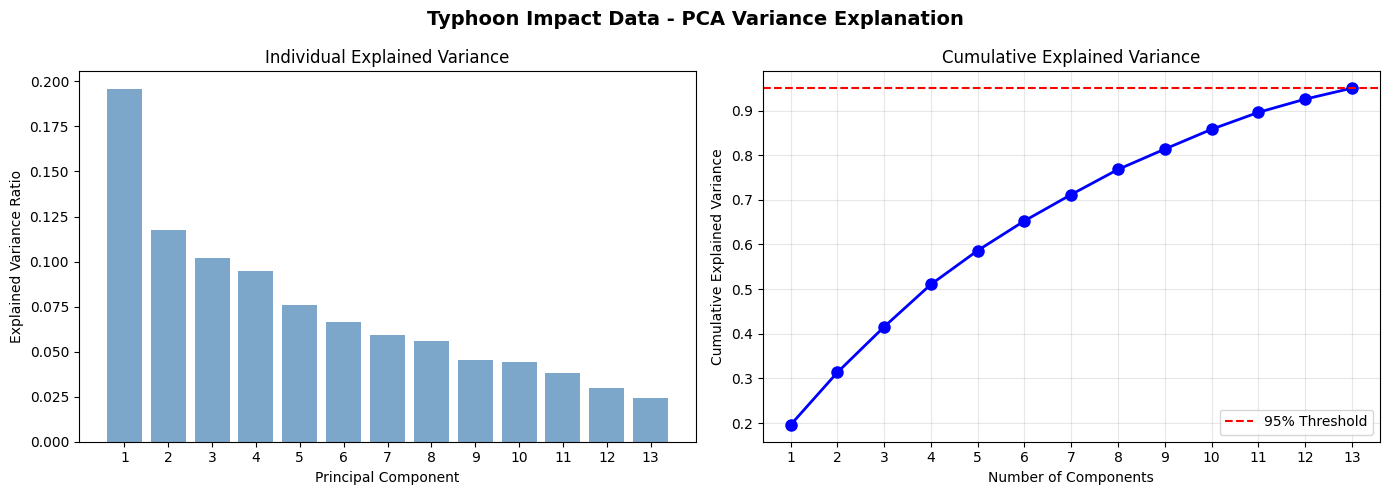

In [145]:
# Run PCA pipeline on typhoon impact data
typhoon_pca_results = run_complete_pca_pipeline(
    input_dataframe=df,
    n_components=None,  # Auto-determine based on variance threshold
    variance_threshold=0.95,
    categorical_columns=None,  # Include all columns (typhoon_type is now ordinal encoded)
    show_plots=True,
    return_loadings=True
)

In [146]:
# Access PCA results
typhoon_pca_df = typhoon_pca_results['pca_dataframe']
typhoon_pca_loadings = typhoon_pca_results['feature_loadings']

print("PCA Transformed Data:")
display(typhoon_pca_df.head(10))

print("\nFeature Loadings (Component Weights):")
display(typhoon_pca_loadings)

PCA Transformed Data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.373359,-1.034457,-1.457714,0.604345,-0.740140,1.911614,-0.586289,1.994401,-0.123453,-0.238751,-0.246403,1.961085,0.396925
1,-0.318723,-1.372934,-1.778578,0.177179,-0.424988,1.668007,-0.703683,1.683049,-0.579042,-0.008778,0.240141,-0.100375,-0.219968
2,0.048344,-1.249569,-1.202773,1.002579,-0.950009,2.062343,-0.766427,1.330385,-0.248668,-0.246097,0.019775,0.844594,0.437114
3,0.087227,-1.243251,-1.211222,0.990182,-0.942209,2.054839,-0.762184,1.350574,-0.244697,-0.245178,0.015263,0.877477,0.429878
4,0.150828,-1.239968,-1.193974,0.986860,-0.974068,2.031078,-0.744404,1.370624,-0.287397,-0.195356,0.020354,0.823644,0.552209
5,0.062828,-1.246293,-1.205747,0.998849,-0.948509,2.074102,-0.761756,1.336836,-0.242210,-0.254702,0.002573,0.870231,0.443302
6,-0.461023,0.083196,-1.561774,1.536921,-0.845313,1.580295,-0.627380,1.016434,-0.405095,0.086129,0.169865,-0.151773,-0.650724
7,-0.696124,-1.045471,0.638170,0.831230,0.536402,1.528791,-0.721826,2.153176,-0.053698,-0.481898,0.330240,-0.448958,-0.480094
8,-0.469070,-0.283782,1.976030,1.999319,1.007820,1.256420,-0.579514,2.333861,0.016014,-0.413696,0.439756,-0.833647,-1.017479
9,-0.592660,-1.038597,0.662397,0.824280,0.489274,1.501520,-0.692167,2.186759,-0.113514,-0.413063,0.326369,-0.513685,-0.292062



Feature Loadings (Component Weights):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
families,0.402614,0.052477,-0.091354,-0.142382,0.102488,-0.300730,-0.003326,0.230970,-0.033453,0.148209,0.192588,0.143468,-0.213597
person,0.407457,0.050139,-0.089194,-0.142815,0.102899,-0.301041,-0.002926,0.218671,-0.037325,0.143708,0.187418,0.126483,-0.207339
brgy,0.328329,0.013718,0.106329,-0.007192,-0.190182,-0.120122,0.099739,0.096247,-0.244603,0.278815,0.023868,-0.328752,0.711474
dead,0.074860,0.103455,-0.007256,-0.105050,0.066389,0.127324,0.658262,0.141872,-0.358015,-0.186838,-0.451457,-0.190681,-0.162088
injured/ill,0.137927,-0.044622,0.025572,-0.105509,0.197682,0.308470,-0.005598,-0.126054,0.431498,0.673389,-0.358000,-0.161913,-0.108468
missing,0.054149,0.038656,-0.029479,-0.062809,0.023977,0.353600,0.569116,-0.106492,0.288772,-0.018288,0.664141,0.000388,0.051514
totally,0.353766,-0.010513,-0.018025,-0.099667,-0.123585,0.124836,-0.156916,-0.190233,0.225845,-0.455464,-0.096970,-0.222514,-0.119040
partially,0.388929,-0.014867,0.030324,-0.093441,-0.101228,0.036038,-0.191065,-0.161964,0.110737,-0.243858,0.034687,-0.444185,-0.070533
cost,0.336450,0.069981,-0.070090,-0.092385,0.043978,0.178491,0.088404,0.156281,0.117464,-0.141838,-0.298781,0.507653,0.086217
duration_in_par_hours,-0.012612,-0.451666,0.341781,-0.161534,0.287105,0.062233,-0.034514,0.221062,0.018397,-0.113565,0.037227,-0.015628,0.036068


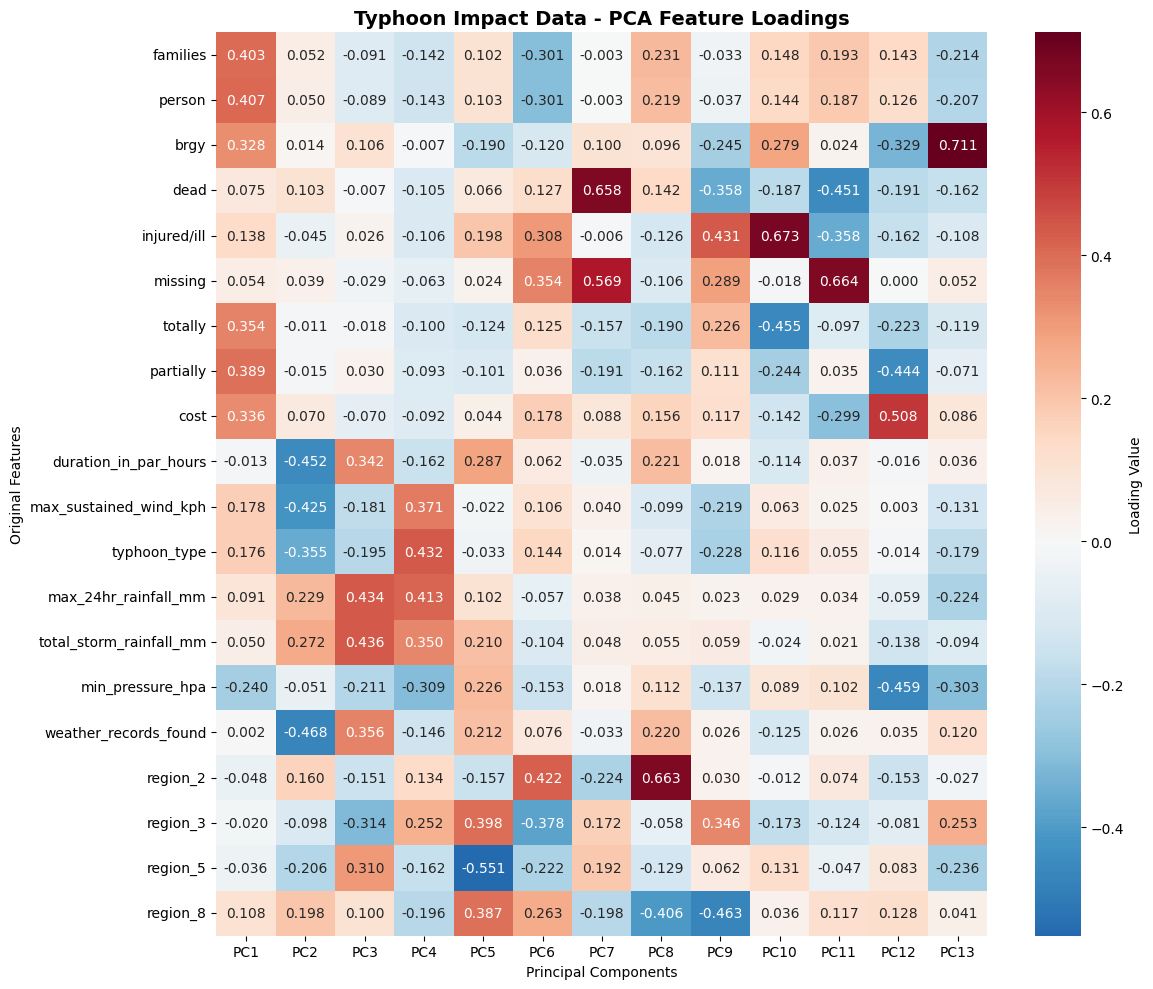

In [147]:
# Visualize feature loadings heatmap
def plot_feature_loadings_heatmap(feature_loadings_df: pd.DataFrame, figure_title: str = 'PCA Feature Loadings Heatmap') -> None:
    """
    Plot a heatmap of PCA feature loadings.
    
    Parameters:
    -----------
    feature_loadings_df : pd.DataFrame
        DataFrame containing feature loadings
    figure_title : str
        Title for the heatmap
    """
    loadings_heatmap_fig, loadings_heatmap_ax = plt.subplots(figsize=(12, 10))
    
    sns.heatmap(
        feature_loadings_df,
        annot=True,
        fmt='.3f',
        cmap='RdBu_r',
        center=0,
        ax=loadings_heatmap_ax,
        cbar_kws={'label': 'Loading Value'}
    )
    
    loadings_heatmap_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    loadings_heatmap_ax.set_xlabel('Principal Components')
    loadings_heatmap_ax.set_ylabel('Original Features')
    
    plt.tight_layout()
    plt.show()
    plt.close(loadings_heatmap_fig)

# Plot the feature loadings heatmap
plot_feature_loadings_heatmap(typhoon_pca_loadings, 'Typhoon Impact Data - PCA Feature Loadings')

In [148]:
# Summary statistics for PCA components
print("PCA Components Summary Statistics:")
display(typhoon_pca_df.describe())

print(f"\nTotal samples: {len(typhoon_pca_df)}")
print(f"Number of PCA components: {typhoon_pca_df.shape[1]}")
print(f"Total variance explained: {typhoon_pca_results['total_variance_explained']*100:.2f}%")

PCA Components Summary Statistics:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
count,1776.000000,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1776.000000,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03,1.776000e+03
mean,0.000000,4.800964e-17,-1.280257e-16,3.200643e-17,-1.440289e-16,4.800964e-17,0.000000,-1.600321e-16,-1.280257e-16,4.800964e-17,-4.000804e-17,4.000804e-17,-4.000804e-17
std,1.979460,1.534026e+00,1.429934e+00,1.378745e+00,1.232447e+00,1.153219e+00,1.087023,1.060327e+00,9.552764e-01,9.416167e-01,8.712939e-01,7.707842e-01,7.004482e-01
min,-1.824466,-2.859730e+00,-5.041012e+00,-5.828364e+00,-4.053260e+00,-9.105840e+00,-4.606493,-6.080928e+00,-1.142994e+01,-7.869843e+00,-1.066508e+01,-6.664883e+00,-5.359747e+00
25%,-0.828522,-9.343623e-01,-1.124342e+00,-6.691623e-01,-9.985786e-01,-5.569896e-01,-0.563199,-7.320252e-01,-5.322900e-01,-3.492625e-01,-1.927825e-01,-3.024687e-01,-4.112835e-01
50%,-0.487416,-4.707223e-02,-6.258571e-02,-3.107794e-02,-1.310523e-01,-2.249360e-01,0.211577,-2.745694e-01,1.087276e-02,-6.963461e-02,-1.977425e-02,-4.191534e-03,-2.623545e-02
75%,0.090842,9.272413e-01,1.011439e+00,7.400334e-01,8.824705e-01,6.701474e-01,0.352937,5.754880e-01,4.568566e-01,3.199050e-01,2.133969e-01,2.463090e-01,3.704365e-01
max,23.390824,7.721537e+00,5.082019e+00,7.518867e+00,5.302083e+00,1.681103e+01,29.105455,7.033963e+00,1.283127e+01,1.161175e+01,2.031666e+01,6.945182e+00,6.170206e+00



Total samples: 1776
Number of PCA components: 13
Total variance explained: 95.02%


## Plotting 2D and 3D

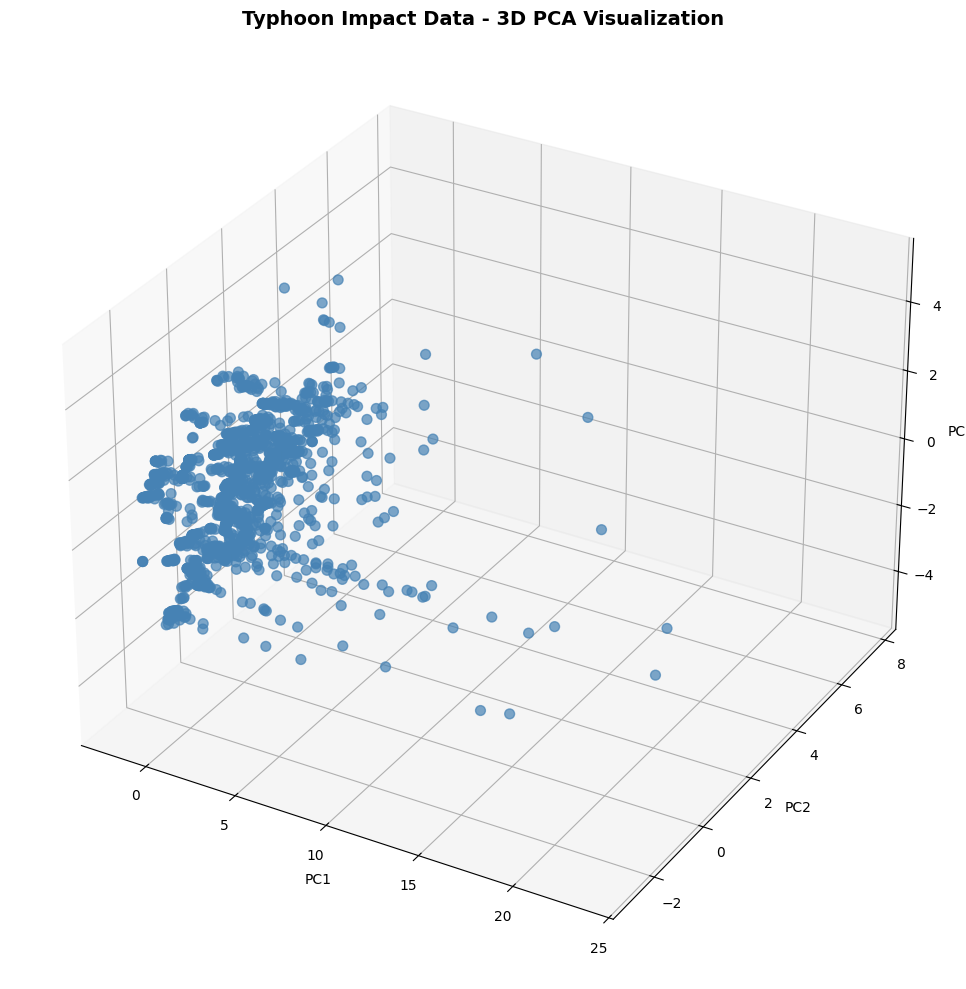

In [149]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_3d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 3D Visualization'
) -> None:
    """
    Create a 3D scatter plot of the first 3 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2, PC3)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 3D plot
    """
    pca_3d_fig = plt.figure(figsize=(12, 10))
    pca_3d_ax = pca_3d_fig.add_subplot(111, projection='3d')
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    pc3_values = pca_dataframe['PC3'].values
    
    if cluster_labels is not None:
        scatter_plot = pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_3d_fig.colorbar(scatter_plot, ax=pca_3d_ax, label='Cluster')
    else:
        pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_3d_ax.set_xlabel('PC1')
    pca_3d_ax.set_ylabel('PC2')
    pca_3d_ax.set_zlabel('PC3')
    pca_3d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_3d_fig)

# Plot 3D PCA visualization
plot_pca_3d(typhoon_pca_df, figure_title='Typhoon Impact Data - 3D PCA Visualization')

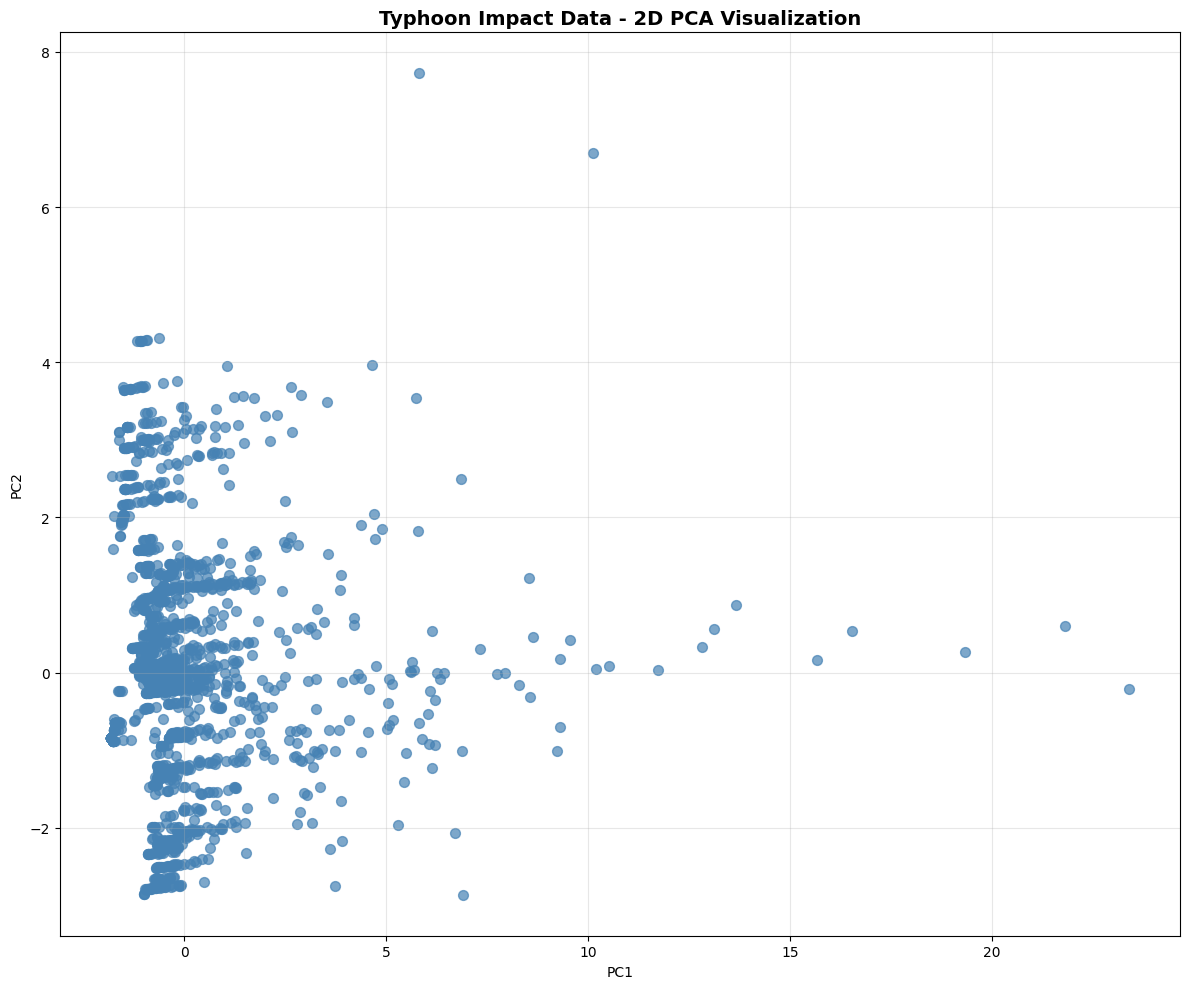

In [150]:
# 2D PCA Visualization
def plot_pca_2d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 2D Visualization'
) -> None:
    """
    Create a 2D scatter plot of the first 2 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 2D plot
    """
    pca_2d_fig, pca_2d_ax = plt.subplots(figsize=(12, 10))
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    
    if cluster_labels is not None:
        scatter_plot_2d = pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_2d_fig.colorbar(scatter_plot_2d, ax=pca_2d_ax, label='Cluster')
    else:
        pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_2d_ax.set_xlabel('PC1')
    pca_2d_ax.set_ylabel('PC2')
    pca_2d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    pca_2d_ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_2d_fig)

# Plot 2D PCA visualization
plot_pca_2d(typhoon_pca_df, figure_title='Typhoon Impact Data - 2D PCA Visualization')